In [52]:
h = 0.1
n = 100

100

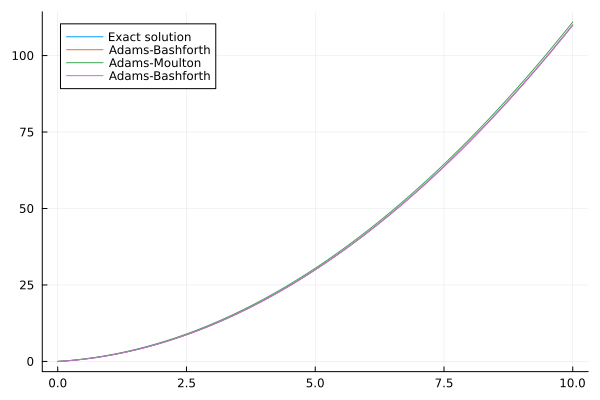

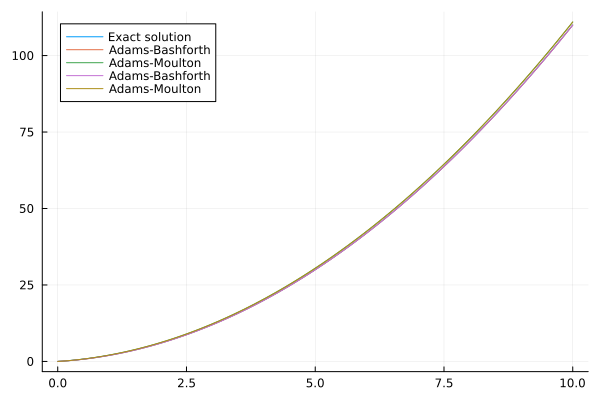

n = 100, h = 0.1, y(x) = x(x+1)
Time taken by Adams-Bashforth method: 31.999826431274414
Time taken by Adams-Moulton method: 46.000003814697266
Average percentage error of Adams-Bashforth method: 0.6267485035243232
Average percentage error of Adams-Moulton method: 1.9682622914211176

In [7]:
using LinearAlgebra
using Plots

# First-order ODE
# Define the exact solution
function exact_solution(x)
    return x*(x+1)
end

# Define the derivative function
function deriv_func(x, y)
    return 2*x+1
end

# Define the Adams-Bashforth method
function adams_bashforth(deriv_func, x0, y0, h, n)
    x = range(x0, stop=x0+h*n, length=n+1)
    y_list = [y0]
    # Use the Forward Euler method to compute initial points
    for i in 2:4
        y = y_list[end] + h*deriv_func(x[i-1], y_list[end])
        push!(y_list, y)
    end
    # Use the Adams-Bashforth method to compute the rest of the points
    for i in 4:n   #yn+3
        y = y_list[end] + h*(23*deriv_func(x[i], y_list[end]) - 16*deriv_func(x[i-1], y_list[end-1]) + 5*deriv_func(x[i-2], y_list[end-2]))/12
        push!(y_list, y)
    end
    return convert(Array{Float64,1}, y_list)
end

# Define the Adams-Moulton method
function adams_moulton(deriv_func, x0, y0, h, n)
    x = range(x0, stop=x0+h*n, length=n+1)
    y_list = [y0]
    # Use the Forward Euler method to compute the first point
    y = y0 + h*deriv_func(x0, y0)
    push!(y_list, y)
    # Use the Adams-Moulton method to compute the rest of the points
    for i in 3:n+1
        # predicted value of y at the next time step, using the Adams-Moulton method of order 2
        y_pred = y_list[end] + h*(deriv_func(x[i], y_list[end]) + deriv_func(x[i-1], y_list[end-1]))/2
        # Corrector using Adams-Moulton method of order 2
        y = y_list[end] + h*deriv_func(x[i], y_pred)
        push!(y_list, y)
    end
    return convert(Array{Float64,1}, y_list)
end

# Set the initial conditions and parameters
x0 = 0.0
y0 = 0.0

# Calculate the exact solution
x = range(x0, stop=x0+h*n, length=n+1)
y_exact = exact_solution.(x)

# Calculate the Adams-Bashforth solution and time
t0 = time()
y_ab = adams_bashforth(deriv_func, x0, y0, h, n)
t_ab = (time()-t0)*1000

# Calculate the Adams-Moulton solution and time
t0 = time()
y_am = adams_moulton(deriv_func, x0, y0, h, n)
t_am = (time()-t0)*1000

# Calculate the tolerance values
tol_ab = abs.(y_ab - y_exact)
tol_am = abs.(y_am - y_exact)

println("n = $n, h = $h, y(x) = x(x+1)")
println("Time taken by Adams-Bashforth method: $t_ab")
println("Time taken by Adams-Moulton method: $t_am")

APE_ab = mean(abs.(tol_ab./y_exact)[2:end])*100
APE_am = mean(abs.(tol_am./y_exact)[2:end])*100

# Print the results
println("Average percentage error of Adams-Bashforth method: $APE_ab")
println("Average percentage error of Adams-Moulton method: $APE_am")

plot(x, y_exact, label="Exact solution")
plot!(x, y_ab, label="Adams-Bashforth")
plot!(x, y_am, label="Adams-Moulton")
plot!(titlefont=font(12))
display(plot!(x, y_ab, label="Adams-Bashforth"))
display(plot!(x, y_am, label="Adams-Moulton"))


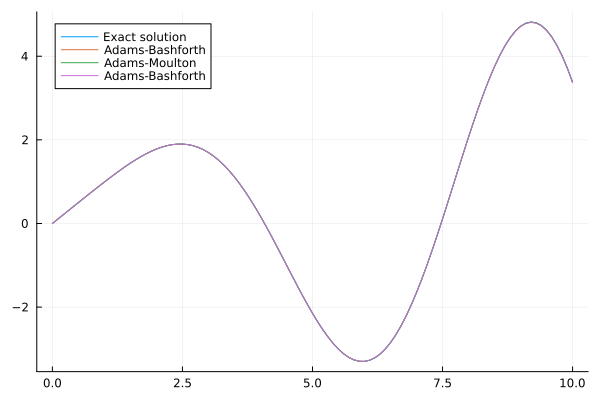

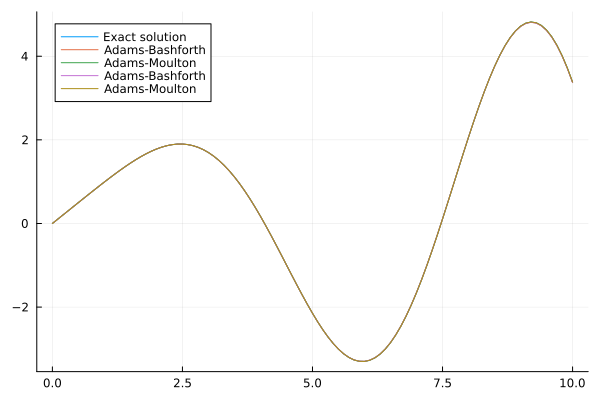

n = 100, h = 0.1, y(x) = x(x+1)
Time taken by Adams-Bashforth method: 194.0000057220459
Time taken by Adams-Moulton method: 316.9999122619629
Average percentage error of Adams-Bashforth method: 0.22310839352757064
Average percentage error of Adams-Moulton method: 0.01960056923986558

In [53]:
using Plots

# Define the exact solution
function exact_solution(x)
    return 0.5 * (3 * sin.(x) .- x .* cos.(x))
end

# Define the derivative function
function deriv_func(x, y)
    return [y[2], sin.(x) .- y[1]]
end

# Define the Adams-Bashforth method
function adams_bashforth(deriv_func, x0, y0, h, n)
    x = range(x0, x0 + h*n, step = h)
    y_list = [y0]
    # Use the Forward Euler method to compute initial points
    for i in 2:4
        y = y_list[end] .+ h .* deriv_func(x[i-1], y_list[end])
        push!(y_list, y)
    end
    # Use the Adams-Bashforth method to compute the rest of the points
    for i in 4:n
        #Adams-Bashforth Order 3 (yn+3)
        y = y_list[end] .+ h .* (23 .* deriv_func(x[i], y_list[end]) .- 16 .* deriv_func(x[i-1], y_list[end-1]) .+ 5 .* deriv_func(x[i-2], y_list[end-2])) ./ 12
        push!(y_list, y)
    end
    return [y[1] for y in y_list]
end

# Define the Adams-Moulton method
function adams_moulton(deriv_func, x0, y0, h, n)
    x = range(x0, x0 + h*n, step = h)
    y_list = [y0]
    # Use the Forward Euler method to compute initial points
    for i in 2:4
        y = y_list[end] .+ h .* deriv_func(x[i-1], y_list[end])
        push!(y_list, y)
    end
    # Use the Adams-Moulton method to compute the rest of the points
    for i in 4:n
        #Adams-Bashforth Order 3 (yn+3)
        y_pred = y_list[end] .+ h .* (23 .* deriv_func(x[i], y_list[end]) .- 16 .* deriv_func(x[i-1], y_list[end-1]) .+ 5 .* deriv_func(x[i-2], y_list[end-2])) ./ 12     
        # Corrector using Adams-Moulton method of order 3 (yn+2)
        y = y_list[end] .+ h .* (5 .* deriv_func(x[i]+h, y_pred) .+ 8 .* deriv_func(x[i], y_list[end]) .- deriv_func(x[i-1], y_list[end-1])) ./ 12
        push!(y_list, y)
    end
    return [y[1] for y in y_list]
end

# Set the initial conditions and parameters
x0 = 0.0
y0 = [0.0, 1.0]

# Calculate the exact solution
x = range(x0, x0 + h*n, step = h)
y_exact = exact_solution(x)

# Calculate the Adams-Bashforth solution and time
t0 = time()
y_ab = adams_bashforth(deriv_func, x0, y0, h, n)
t_ab = (time()-t0) * 1000

t0 = time()
y_am = adams_moulton(deriv_func, x0, y0, h, n)
t_am = (time()-t0)*1000

# Calculate the tolerance values
tol_ab = abs.(y_ab - y_exact)
tol_am = abs.(y_am - y_exact)

println("n = $n, h = $h, y(x) = x(x+1)")
println("Time taken by Adams-Bashforth method: $t_ab")
println("Time taken by Adams-Moulton method: $t_am")

APE_ab = mean(abs.(tol_ab./y_exact)[2:end])*100
APE_am = mean(abs.(tol_am./y_exact)[2:end])*100

# Print the results
println("Average percentage error of Adams-Bashforth method: $APE_ab")
println("Average percentage error of Adams-Moulton method: $APE_am")

plot(x, y_exact, label="Exact solution")
plot!(x, y_ab, label="Adams-Bashforth")
plot!(x, y_am, label="Adams-Moulton")
plot!(titlefont=font(12))
display(plot!(x, y_ab, label="Adams-Bashforth"))
display(plot!(x, y_am, label="Adams-Moulton"))

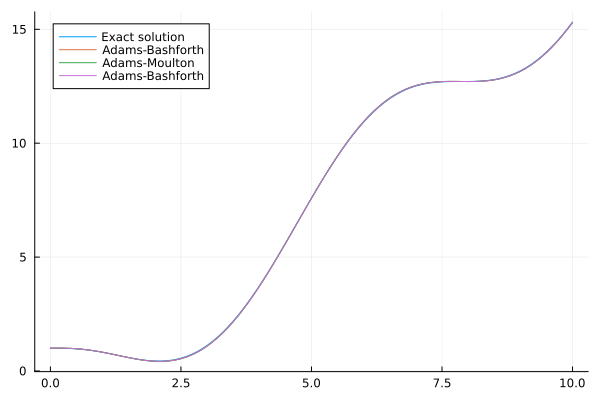

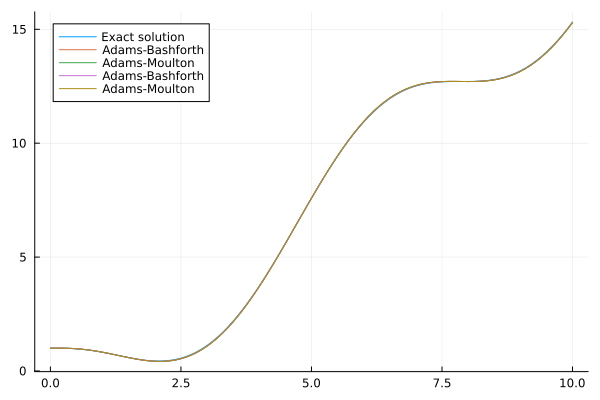

n = 100, h = 0.1, y(x) = x(x+1)
Time taken by Adams-Bashforth method: 183.0000877380371
Time taken by Adams-Moulton method: 302.99997329711914
Average percentage error of Adams-Bashforth method: 0.7852827851144187
Average percentage error of Adams-Moulton method: 0.8395746140508287


In [61]:
using Plots

# Define the exact solution
function exact_solution(x)
    y = similar(x)
    for i in eachindex(x)
        y[i] = 2x[i] + 2*exp(-x[i]) + 2cos(x[i]) - 3
    end
    return y
end

# Define the derivative function
function deriv_func(x, y)
    return [y[2], y[3], -y[3] - y[2] - y[1] + 2x - 1]
end

# Define the Adams-Bashforth method
function adams_bashforth(deriv_func, x0, y0, h, n)
    x = range(x0, x0 + h*n, step = h)
    y_list = [y0]
    # Use the Forward Euler method to compute initial points
    for i in 2:4
        y = y_list[end] .+ h .* deriv_func(x[i-1], y_list[end])
        push!(y_list, y)
    end
    # Use the Adams-Bashforth method to compute the rest of the points
    for i in 4:n
        #Adams-Bashforth Order 3 (yn+3)
        y = y_list[end] .+ h .* (23 .* deriv_func(x[i], y_list[end]) .- 16 .* deriv_func(x[i-1], y_list[end-1]) .+ 5 .* deriv_func(x[i-2], y_list[end-2])) ./ 12
        push!(y_list, y)
    end
    return [y[1] for y in y_list]
end

# Define the Adams-Moulton method
function adams_moulton(deriv_func, x0, y0, h, n)
    x = range(x0, x0 + h*n, step = h)
    y_list = [y0]
    # Use the Forward Euler method to compute initial points
    for i in 2:4
        y = y_list[end] .+ h .* deriv_func(x[i-1], y_list[end])
        push!(y_list, y)
    end
    # Use the Adams-Moulton method to compute the rest of the points
    for i in 4:n
        #Adams-Bashforth Order 3 (yn+3)
        y_pred = y_list[end] .+ h .* (23 .* deriv_func(x[i], y_list[end]) .- 16 .* deriv_func(x[i-1], y_list[end-1]) .+ 5 .* deriv_func(x[i-2], y_list[end-2])) ./ 12     
        # Corrector using Adams-Moulton method of order 3 (yn+2)
        y = y_list[end] .+ h .* (5 .* deriv_func(x[i]+h, y_pred) .+ 8 .* deriv_func(x[i], y_list[end]) .- deriv_func(x[i-1], y_list[end-1])) ./ 12
        push!(y_list, y)
    end
    return [y[1] for y in y_list]
end

# Set the initial conditions and parameters
x0 = 0.0
y0 = [1.0, 0.0, 0.0]

# Calculate the exact solution
x = range(x0, x0 + h*n, step = h)
y_exact = exact_solution(x)

# Calculate the Adams-Bashforth solution and time
t0 = time()
y_ab = adams_bashforth(deriv_func, x0, y0, h, n)
t_ab = (time()-t0) * 1000

t0 = time()
y_am = adams_moulton(deriv_func, x0, y0, h, n)
t_am = (time()-t0)*1000

# Calculate the tolerance values
tol_ab = abs.(y_ab - y_exact)
tol_am = abs.(y_am - y_exact)

println("n = $n, h = $h, y(x) = x(x+1)")
println("Time taken by Adams-Bashforth method: $t_ab")
println("Time taken by Adams-Moulton method: $t_am")

APE_ab = mean(abs.(tol_ab./y_exact)[2:end])*100
APE_am = mean(abs.(tol_am./y_exact)[2:end])*100

# Print the results
println("Average percentage error of Adams-Bashforth method: $APE_ab")
println("Average percentage error of Adams-Moulton method: $APE_am")

plot(x, y_exact, label="Exact solution")
plot!(x, y_ab, label="Adams-Bashforth")
plot!(x, y_am, label="Adams-Moulton")
plot!(titlefont=font(12))
display(plot!(x, y_ab, label="Adams-Bashforth"))
display(plot!(x, y_am, label="Adams-Moulton"))

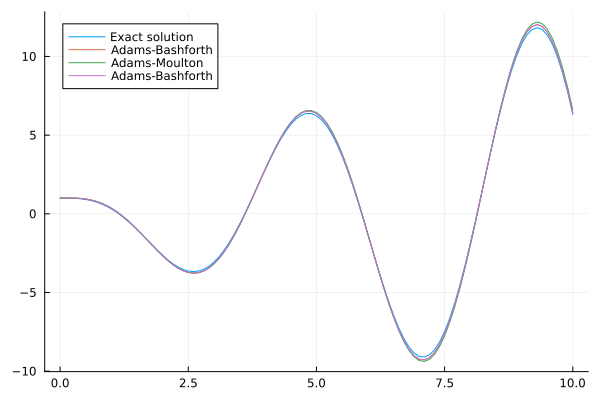

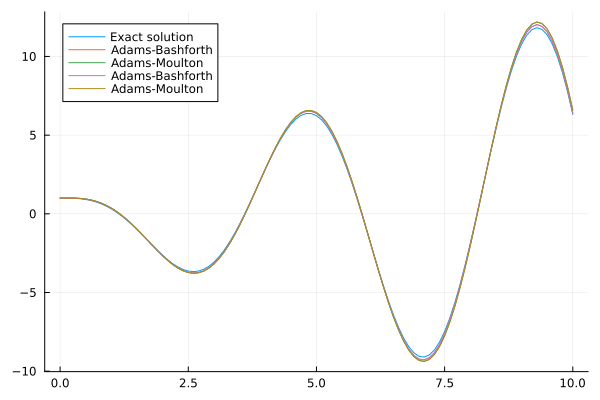

n = 100, h = 0.1, y(x) = x(x+1)
Time taken by Adams-Bashforth method: 194.0000057220459
Time taken by Adams-Moulton method: 300.0001907348633
Average percentage error of Adams-Bashforth method: 9.155539179211978
Average percentage error of Adams-Moulton method: 14.013618051492674

In [64]:
using Plots

# Define the exact solution
function exact_solution(x)
    y = similar(x)
    for i in eachindex(x)
        y[i] = ((x[i] - 1)*sin(sqrt(2)*x[i]))/sqrt(2) + (x[i] + 1)*cos(sqrt(2)*x[i])
    end
    return y
end

# Define the derivative function
function deriv_func(x, y)
    return [y[2], y[3], y[4], -4*y[3] - 4*y[1]]
end

# Define the Adams-Bashforth method
function adams_bashforth(deriv_func, x0, y0, h, n)
    x = range(x0, x0 + h*n, step = h)
    y_list = [y0]
    # Use the Forward Euler method to compute initial points
    for i in 2:4
        y = y_list[end] .+ h .* deriv_func(x[i-1], y_list[end])
        push!(y_list, y)
    end
    # Use the Adams-Bashforth method to compute the rest of the points
    for i in 4:n
        #Adams-Bashforth Order 3 (yn+3)
        y = y_list[end] .+ h .* (23 .* deriv_func(x[i], y_list[end]) .- 16 .* deriv_func(x[i-1], y_list[end-1]) .+ 5 .* deriv_func(x[i-2], y_list[end-2])) ./ 12
        push!(y_list, y)
    end
    return [y[1] for y in y_list]
end

# Define the Adams-Moulton method
function adams_moulton(deriv_func, x0, y0, h, n)
    x = range(x0, x0 + h*n, step = h)
    y_list = [y0]
    # Use the Forward Euler method to compute initial points
    for i in 2:4
        y = y_list[end] .+ h .* deriv_func(x[i-1], y_list[end])
        push!(y_list, y)
    end
    # Use the Adams-Moulton method to compute the rest of the points
    for i in 4:n
        #Adams-Bashforth Order 3 (yn+3)
        y_pred = y_list[end] .+ h .* (23 .* deriv_func(x[i], y_list[end]) .- 16 .* deriv_func(x[i-1], y_list[end-1]) .+ 5 .* deriv_func(x[i-2], y_list[end-2])) ./ 12     
        # Corrector using Adams-Moulton method of order 3 (yn+2)
        y = y_list[end] .+ h .* (5 .* deriv_func(x[i]+h, y_pred) .+ 8 .* deriv_func(x[i], y_list[end]) .- deriv_func(x[i-1], y_list[end-1])) ./ 12
        push!(y_list, y)
    end
    return [y[1] for y in y_list]
end

# Set the initial conditions and parameters
x0 = 0.0
y0 = [1.0, 0.0, 0.0, -4.0]

# Calculate the exact solution
x = range(x0, x0 + h*n, step = h)
y_exact = exact_solution(x)

# Calculate the Adams-Bashforth solution and time
t0 = time()
y_ab = adams_bashforth(deriv_func, x0, y0, h, n)
t_ab = (time()-t0) * 1000

t0 = time()
y_am = adams_moulton(deriv_func, x0, y0, h, n)
t_am = (time()-t0)*1000

# Calculate the tolerance values
tol_ab = abs.(y_ab - y_exact)
tol_am = abs.(y_am - y_exact)

println("n = $n, h = $h, y(x) = x(x+1)")
println("Time taken by Adams-Bashforth method: $t_ab")
println("Time taken by Adams-Moulton method: $t_am")

APE_ab = mean(abs.(tol_ab./y_exact)[2:end])*100
APE_am = mean(abs.(tol_am./y_exact)[2:end])*100

# Print the results
println("Average percentage error of Adams-Bashforth method: $APE_ab")
println("Average percentage error of Adams-Moulton method: $APE_am")

plot(x, y_exact, label="Exact solution")
plot!(x, y_ab, label="Adams-Bashforth")
plot!(x, y_am, label="Adams-Moulton")
plot!(titlefont=font(12))
display(plot!(x, y_ab, label="Adams-Bashforth"))
display(plot!(x, y_am, label="Adams-Moulton"))